In [1]:
import numpy as np
import pandas as pd
import scipy
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn import metrics
from sklearn.cluster import DBSCAN
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
import scipy.stats as stats
%matplotlib inline
from sklearn import ensemble
from sklearn.manifold import TSNE
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
import warnings
warnings.filterwarnings('ignore')

/Users/krishnadevabhaktuni/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


http://archive.ics.uci.edu/ml/datasets/gene+expression+cancer+RNA-Seq

In [2]:
fish_df = pd.read_csv('fish.csv')

In [3]:
fish_df.tail()

,Species,Weight,Length1,Length2,Length3,Height,Width
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672
158,Smelt,19.9,13.8,15.0,16.2,2.9322,1.8792


In [4]:
fish_df.Species.value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

In [5]:
fish_df.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [6]:
fish_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [7]:
X = fish_df.drop('Species', axis = 1)

In [8]:
le = LabelEncoder()
y = le.fit_transform(fish_df['Species'])

In [9]:
scaler = StandardScaler().fit_transform(X)

In [10]:
kmeans_cluster = KMeans(n_clusters=5, random_state=123)

# Fit model
%timeit kmeans_cluster.fit(X)
y_pred = kmeans_cluster.predict(X)

54.4 ms ± 9.67 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [11]:
len(y_pred)

159

In [12]:
print(len(y))

159


In [13]:
pca = PCA(n_components = 2).fit_transform(X)

In [14]:
kmeans_cluster7 = KMeans(n_clusters= 7, random_state=123)

# Fit model
%timeit kmeans_cluster7.fit(scaler)
y_pred_scaler7 = kmeans_cluster7.predict(scaler)
print("Adjusted Rand Index of the Kmeans solution: {}"
      .format(metrics.adjusted_rand_score(y, y_pred_scaler7)))
print("The silhouette score of the KMeans solution: {}"
      .format(metrics.silhouette_score(X, y_pred_scaler7, metric='euclidean')))

53.2 ms ± 4 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Adjusted Rand Index of the Kmeans solution: 0.3030133012651483
The silhouette score of the KMeans solution: 0.3774283408070814


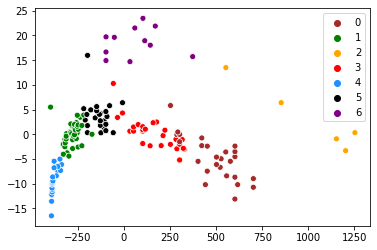

In [15]:
color_dict = dict({0:'brown',
                   1:'green',
                   2: 'orange',
                   3: 'red',
                   4: 'dodgerblue',
                   5: 'black',
                   6: 'purple'})
sns.scatterplot(pca[:,0], pca[:,1], hue = y_pred_scaler7, palette = color_dict)

In [16]:
kmeans_cluster3 = KMeans(n_clusters= 2, random_state=123)

# Fit model
%timeit kmeans_cluster3.fit(scaler)
y_pred_scaler3 = kmeans_cluster3.predict(scaler)
print("Adjusted Rand Index of the Kmeans solution: {}"
      .format(metrics.adjusted_rand_score(y, y_pred_scaler3)))
print("The silhouette score of the KMeans solution: {}"
      .format(metrics.silhouette_score(X, y_pred_scaler3, metric='euclidean')))

36 ms ± 12.5 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Adjusted Rand Index of the Kmeans solution: 0.14055923508068227
The silhouette score of the KMeans solution: 0.6208769617702966


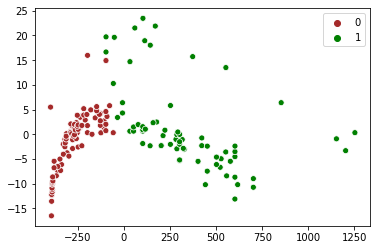

In [17]:
color_dict1 = dict({0:'brown',
                  1:'green',
                  2: 'orange',
                  3: 'red',
                   4: 'dodgerblue'})
sns.scatterplot(pca[:,0], pca[:,1], hue = y_pred_scaler3, palette = color_dict1)

It appears that the Silhouette score is better than ARI

In [50]:
# Defining the agglomerative clustering
dbscan_cluster = DBSCAN(eps= 5, min_samples=1)

# Fit model
y_dbscan = dbscan_cluster.fit_predict(X)
print("Adjusted Rand Index of the DBSCAN solution: {}"
      .format(metrics.adjusted_rand_score(y, y_dbscan)))
print("The silhouette score of the DBSCAN solution: {}"
      .format(metrics.silhouette_score(X, y_dbscan, metric='euclidean')))

Adjusted Rand Index of the DBSCAN solution: 0.051839623856949
The silhouette score of the DBSCAN solution: 0.399289414654062


In [51]:
y_dbscan

array([ 0,  1,  2,  3,  4,  5,  6,  7,  5,  6,  8,  6,  6,  9, 10, 10, 11,
       11, 12, 13, 14, 15, 16, 17, 11, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 32, 35, 36, 37, 38, 37, 39, 37, 40,
       41,  1, 42,  7, 42, 42, 43, 44, 45, 46, 47, 48, 49, 32, 35, 38, 50,
       36, 40, 42, 51, 52, 53, 28, 47, 29, 54, 30, 30, 31, 31, 34, 55, 56,
       57, 32, 32, 57, 58, 34, 57, 35, 36, 35, 39, 59, 36, 60, 41, 40, 61,
       51, 62, 63, 64, 64, 51, 65, 66, 67, 68, 69, 70, 70, 71, 72, 73, 74,
       75, 72, 76, 74, 77, 46, 77, 46, 46, 78, 79, 79, 79, 80, 81, 82, 83,
       84, 85, 86, 87, 88, 89, 90, 91, 92, 52, 52, 52, 52, 52, 52, 52, 52,
       52, 52, 52, 52, 93, 93])

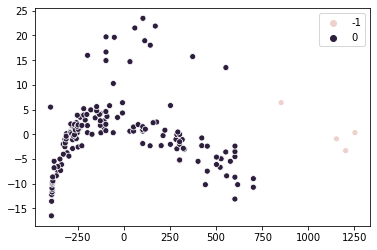

In [49]:
color_dict2 = dict({0:'brown',
                    1:'orange'})
sns.scatterplot(pca[:,0], pca[:,1], hue = y_dbscan1)

In [22]:
# Defining the agglomerative clustering
dbscan_cluster1 = DBSCAN(eps= 1, min_samples=4)

# Fit model
y_dbscan1 = dbscan_cluster1.fit_predict(scaler)
print("Adjusted Rand Index of the DBSCAN Scaler solution: {}"
      .format(metrics.adjusted_rand_score(y, y_dbscan1)))
print("The silhouette score of the DBSCAN Scaler solution: {}"
      .format(metrics.silhouette_score(scaler, y_dbscan1, metric='euclidean')))

Adjusted Rand Index of the DBSCAN Scaler solution: 0.016166408739543916
The silhouette score of the DBSCAN Scaler solution: 0.5211416781514389


In [48]:
y_dbscan1

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1, -1, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0])

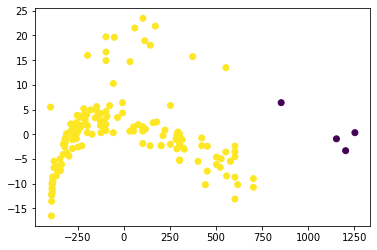

In [23]:
plt.scatter(pca[:,0], pca[:,1], c = y_dbscan1)
plt.show()

In [24]:
pca[0]

array([-156.3160969 ,    3.30901466])

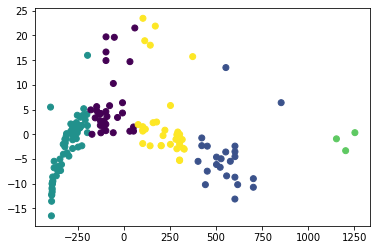

In [25]:
plt.scatter(pca[:,0], pca[:,1], c=y_pred)
plt.show()

In [26]:
# Defining the agglomerative clustering
agg_cluster = AgglomerativeClustering(linkage='complete', 
                                      affinity='cosine',
                                      n_clusters=5)

# Fit model
agg_clusters = agg_cluster.fit_predict(scaler)
print("Adjusted Rand Index of the Hierarchical cosine solution: {}"
      .format(metrics.adjusted_rand_score(y, agg_clusters)))
print("The silhouette score of the Hierarchical cosine solution: {}"
      .format(metrics.silhouette_score(scaler, agg_clusters, metric='euclidean')))

Adjusted Rand Index of the Hierarchical cosine solution: 0.18339690458612487
The silhouette score of the Hierarchical cosine solution: 0.18220834082830514


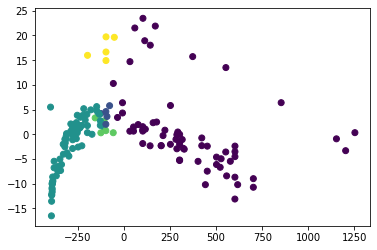

In [27]:
plt.scatter(pca[:,0], pca[:,1], c=agg_clusters)
plt.show()

In [28]:
# Defining the agglomerative clustering
agg_cluster1 = AgglomerativeClustering(linkage='ward', 
                                      affinity='euclidean',
                                      n_clusters=5)

# Fit model
agg_clusters1 = agg_cluster1.fit_predict(scaler)
print("Adjusted Rand Index of the Hierarchical cosine solution: {}"
      .format(metrics.adjusted_rand_score(y, agg_clusters1)))
print("The silhouette score of the Hierarchical cosine solution: {}"
      .format(metrics.silhouette_score(scaler, agg_clusters1, metric='euclidean')))

Adjusted Rand Index of the Hierarchical cosine solution: 0.31005198714689636
The silhouette score of the Hierarchical cosine solution: 0.501041742850258


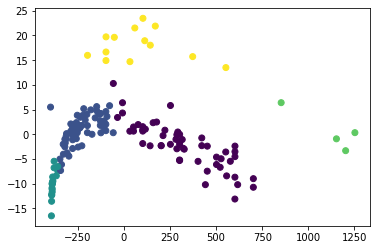

In [29]:
plt.scatter(pca[:,0], pca[:,1], c= agg_clusters1)
plt.show()

In [30]:
pca.shape

(159, 2)

In [31]:
fish_df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


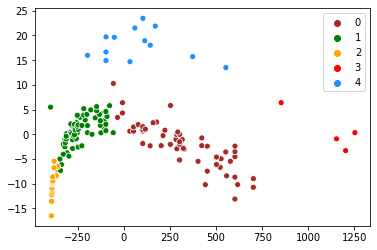

In [32]:
color_dict = dict({0:'brown',
                  1:'green',
                  2: 'orange',
                  3: 'red',
                   4: 'dodgerblue'})
sns.scatterplot(pca[:,0], pca[:,1] , hue = agg_clusters1, palette = color_dict)

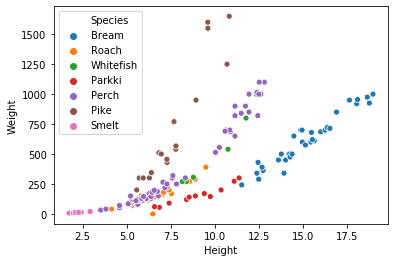

In [33]:
sns.scatterplot(x = 'Height', y = 'Weight', hue = 'Species', data = fish_df)

In [34]:
Sum_of_squared_distances = [] 
K = range(1,15) 
for k in K: 
    km = KMeans(n_clusters=k) 
    km = km.fit(scaler) 
    Sum_of_squared_distances.append(km.inertia_)

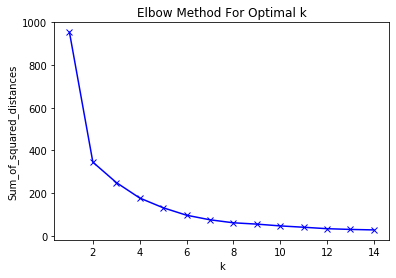

In [35]:
plt.plot(K, Sum_of_squared_distances, 'bx-') 
plt.xlabel('k') 
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k') 
plt.show()

In [36]:
km.inertia_

27.59383698743129

In [37]:
pca_df = pd.DataFrame(pca)

In [38]:
pca_df

,0,1
0,-156.316097,3.309015
1,-108.283040,2.685501
2,-58.342262,0.301748
3,-35.165966,3.389773
4,31.774168,0.611684
...,...,...
154,-387.091587,-9.679492
155,-385.877005,-9.459886
156,-387.041267,-8.654432
157,-379.436003,-6.796120


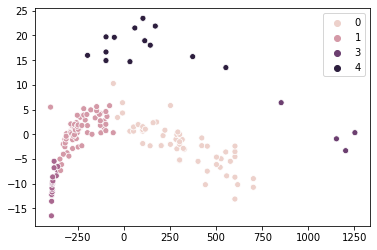

In [39]:
sns.scatterplot(pca[:,0], pca[:,1], hue = agg_clusters1)


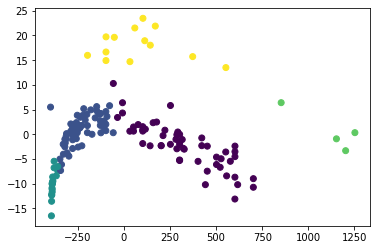

In [40]:
plt.scatter(pca[:,0], pca[:,1], c = agg_clusters1)

In [41]:
from sklearn.mixture import GaussianMixture
gmm_cluster = GaussianMixture(n_components=3, random_state=123)
# Fit model
gmm_clusters = gmm_cluster.fit_predict(scaler)
print("Adjusted Rand Index of the GMM solution: {}"
      .format(metrics.adjusted_rand_score(y, gmm_clusters)))
print("The silhoutte score of the GMM solution: {}"
      .format(metrics.silhouette_score(scaler, gmm_clusters, metric='euclidean')))

Adjusted Rand Index of the GMM solution: 0.24573785071382798
The silhoutte score of the GMM solution: 0.45546324902134633


In [42]:
X['Length'] = (X['Length1']+X['Length2']+X['Length3'])/3

In [43]:
X1 = X.drop(['Length1', 'Length2', 'Length3'], axis = 1)

In [44]:
X1_scaler = StandardScaler().fit_transform(X1)

In [45]:
kmeans_cluster = KMeans(n_clusters= 7, random_state=123)

# Fit model
%timeit kmeans_cluster.fit(X1_scaler)
y_pred_scaler = kmeans_cluster.predict(X1_scaler)
print("Adjusted Rand Index of the Kmeans solution: {}"
      .format(metrics.adjusted_rand_score(y, y_pred_scaler)))
print("The silhouette score of the KMeans solution: {}"
      .format(metrics.silhouette_score(X1_scaler, y_pred_scaler, metric='euclidean')))

57.7 ms ± 2.56 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Adjusted Rand Index of the Kmeans solution: 0.32479076597967366
The silhouette score of the KMeans solution: 0.4946095408966852


By taking an average of lengths our ARI and Silhouette scores improved a lot

In [46]:
kmeans_cluster1 = KMeans(n_clusters= 4, random_state=123)

# Fit model
%timeit kmeans_cluster1.fit(X1_scaler)
y_pred_scaler1 = kmeans_cluster1.predict(X1_scaler)
print("Adjusted Rand Index of the Kmeans solution: {}"
      .format(metrics.adjusted_rand_score(y, y_pred_scaler1)))
print("The silhouette score of the KMeans solution: {}"
      .format(metrics.silhouette_score(X1_scaler, y_pred_scaler1, metric='euclidean')))

47.2 ms ± 5.33 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Adjusted Rand Index of the Kmeans solution: 0.21433069678001207
The silhouette score of the KMeans solution: 0.43843288006199294


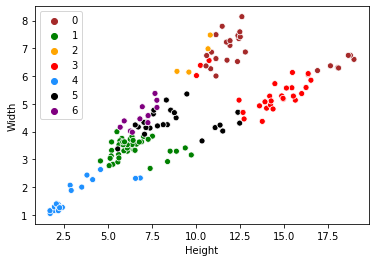

In [47]:
color_dict = dict({0:'brown',
                   1:'green',
                   2: 'orange',
                   3: 'red',
                   4: 'dodgerblue',
                   5: 'black',
                   6: 'purple'})
sns.scatterplot(x = 'Height', y = 'Width', hue = y_pred_scaler7, data = fish_df, palette = color_dict)